In [1]:
# Import my packages
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from matplotlib import animation
from scipy.fft import fft, ifft, ifft2, fftfreq, fft2, fftshift
from scipy import signal

In [2]:
# Here I run all my functions from fig one
%run fig1_functions_latest.ipynb

In [3]:
###### parameters
t = np.arange(0, 8, 1/240)
x = np.arange(-180, 180, 0.5)
x_range = x
t_range = t
E_inh = -30 
E_exc = 60
c_o = 0.5 # max contrast for gradings stimuli
f=1 # Hz
tau = 0.15 # s
time_step = 1/240
FWHM = 5.7

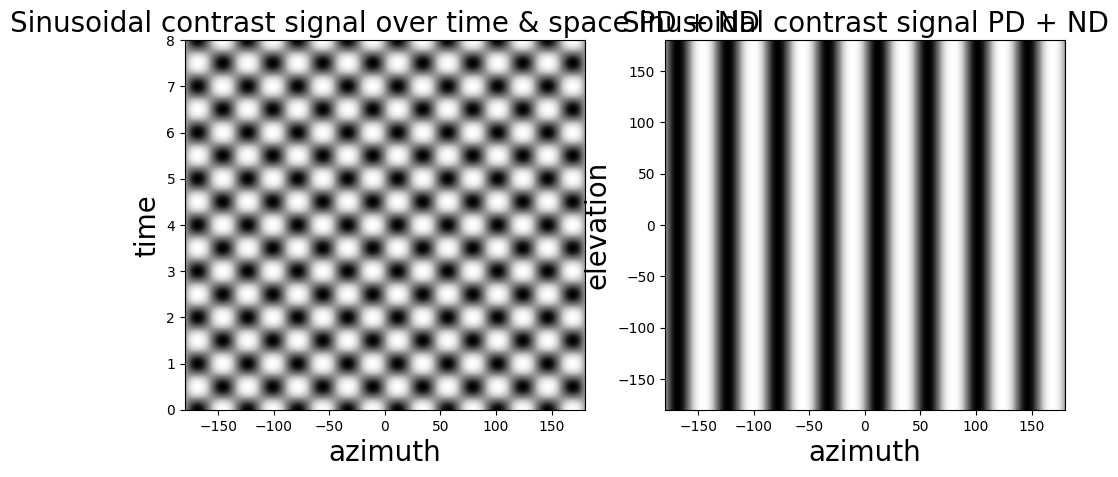

In [4]:
########### Fig2B stimulus ###########
########## parameters
#c_o=0.5 # as Fig.1?
omega=2*math.pi*f  # f=1Hz
k=(2*math.pi)/45 # k is in radians/degrees ,λ=45δεγ
t=np.arange(0, 8, 1/240) 
x=np.arange(-180, 180, 0.5)
y=np.arange(-180, 180, 0.5)
contrast_pd_nd = np.empty([len(x),len(y),len(t)]) 
contrast_pd_od = np.empty([len(x),len(y),len(t)]) 
#time = np.empty([len(t)])
for j, x_value in enumerate(x):
    for i, y_value in enumerate(y):
        contrast_pd_nd[j,i,:] = c_o*np.sin(omega*t[:]-k*x[j]) + c_o*np.sin(omega*t[:]+k*x[j]+np.pi) # where ky=0 cause sin0=0
        contrast_pd_od[j,i,:] = c_o*np.sin(omega*t[:]-k*x[j]) + c_o*np.sin(omega*t[:]-k*y[i])       #ky=0 , kx=kx cos0=1
plt.subplot(1,2,1)
plt.imshow(contrast_pd_nd[:,0,:].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,0,8], aspect = 'auto')
#plt.imshow(contrast_pd_nd.T,cmap='gray')
plt.xlabel('azimuth',fontsize = '20')
plt.ylabel('time',fontsize = '20')
plt.title('Sinusoidal contrast signal over time & space PD + ND',fontsize = '20')
#plt.savefig('pd_nd.png')
plt.subplot(1,2,2)
plt.imshow(contrast_pd_nd[:,:,0].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,-180,180], aspect = 'auto')
plt.xlabel('azimuth',fontsize = '20')
plt.ylabel('elevation',fontsize = '20')
plt.title('Sinusoidal contrast signal PD + ND',fontsize = '20')
plt.subplots_adjust(right=1.5)

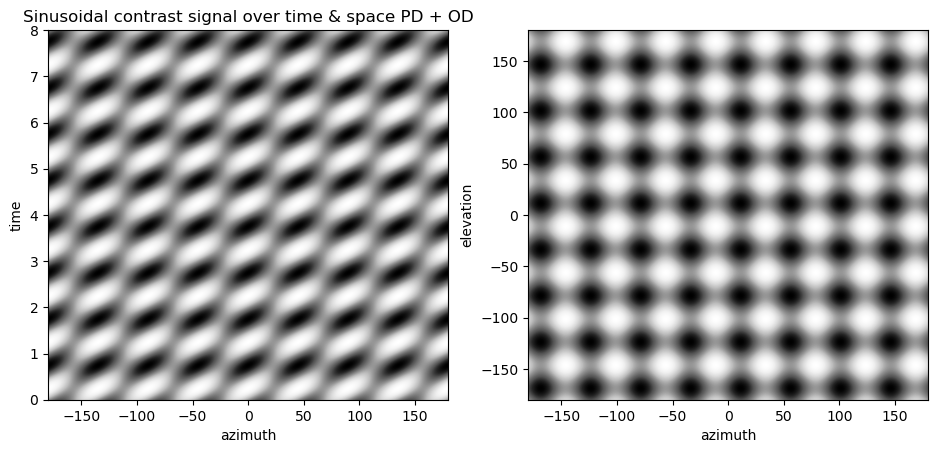

In [177]:
plt.subplot(1,2,1)
plt.imshow(contrast_pd_od[:,0,:].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,0,8], aspect = 'auto')
plt.xlabel('azimuth')
plt.ylabel('time')
plt.title('Sinusoidal contrast signal over time & space PD + OD')
plt.subplot(1,2,2)
plt.imshow(contrast_pd_od[:,:,0].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,-180,180], aspect = 'auto')
plt.xlabel('azimuth')
plt.ylabel('elevation')
plt.subplots_adjust(right=1.5)

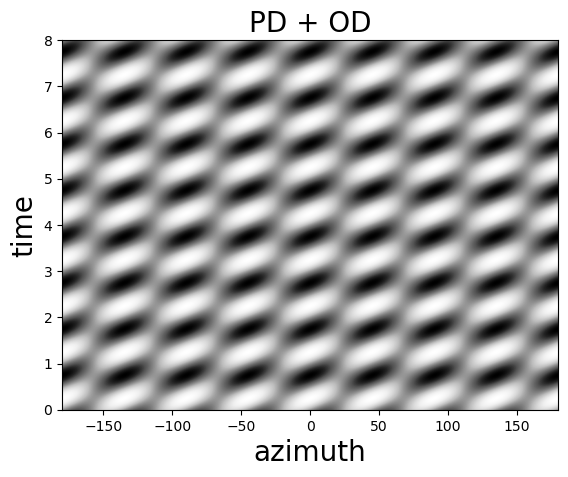

In [211]:
plt.imshow(contrast_pd_od[:,0,:].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,0,8], aspect = 'auto')
plt.xlabel('azimuth',fontsize = '20')
plt.ylabel('time',fontsize = '20')
plt.title('PD + OD',fontsize = '20')
plt.savefig('PD_OD.png')

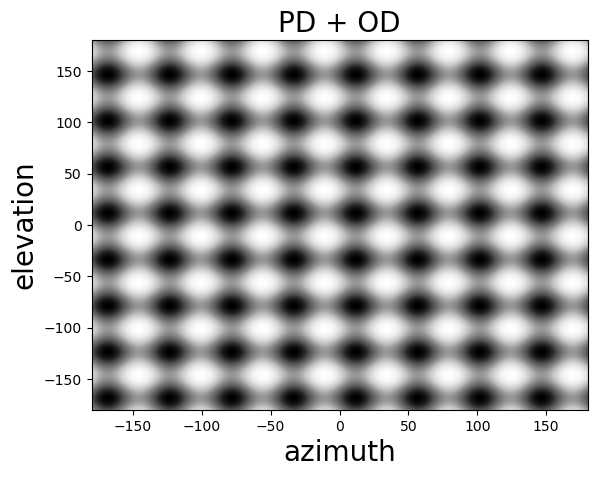

In [212]:
plt.imshow(contrast_pd_od[:,:,0].T, cmap= 'Greys_r',origin='lower', extent = [-180,180,-180,180], aspect = 'auto')
plt.xlabel('azimuth',fontsize = '20')
plt.ylabel('elevation',fontsize = '20')
plt.title('PD + OD',fontsize = '20')
plt.savefig('PD_OD_el_az.png')

In [178]:
# Here I need the data from Fig2A, maybe I can save and import them.
# Histogram of mean responses of calcium during PD, ND, PD+ND, PD+OD

In [21]:
####### PD & ND
####### Run all the functions: filters in FT, convolution, calculation of g's, V_m and calcium responses
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted_dev,f_dev_shifted = time_filter_der(tau,t,time_step)
#c = gratings(c_o, f, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)
c_shifted = contrast_fourier(contrast_pd_nd[:,0,:],x_range,t_range)
filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted) # nondelayed input
filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted_dev, c_shifted,f_dev_shifted,h_shifted) # delayed input
g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)

In [180]:
contrast_pd_nd[:,0,:].shape

(720, 1920)

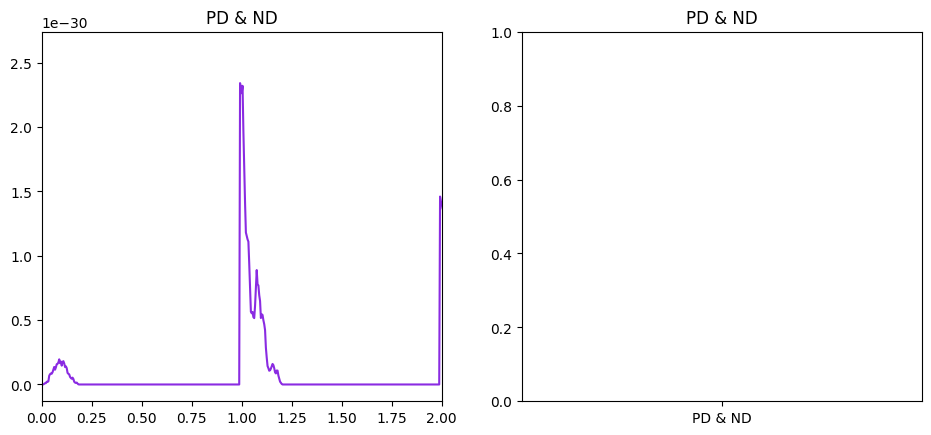

In [23]:
# Plot the caclium responses of one T4 contrast_2D_pd[0,:,:] but wrong amplitude.
plt.subplot(1,2,1)
plt.plot(t,calcium[0],color = 'blueviolet')
plt.xlim(0,2)
plt.title('PD & ND')
plt.subplot(1,2,2)
# now the mean response for the calcium
mean_value = np.mean(calcium[0],axis=0)
#PD_max = 149.25200273724872
normalized_mean = mean_value/PD_max #np.average(calcium[0])/np.max(calcium[0])
plt.bar("PD & ND", normalized_mean, color='blueviolet') # "All responses are normalized by the response of the given component to a grating drifting in the PD of the full model."
plt.title('PD & ND')

plt.ylim(0,1)
plt.subplots_adjust(right=1.5)

In [18]:
####### PD & OD
####### Run all the functions: filters in FT, convolution, calculation of g's, V_m and calcium responses
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted_dev,f_dev_shifted = time_filter_der(tau,t,time_step)
#c = gratings(c_o, f, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)
c_shifted = contrast_fourier(contrast_pd_od[0,:,:],x_range,t_range)
filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted) # nondelayed input
filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted_dev, c_shifted,f_dev_shifted,h_shifted) # delayed input
g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)

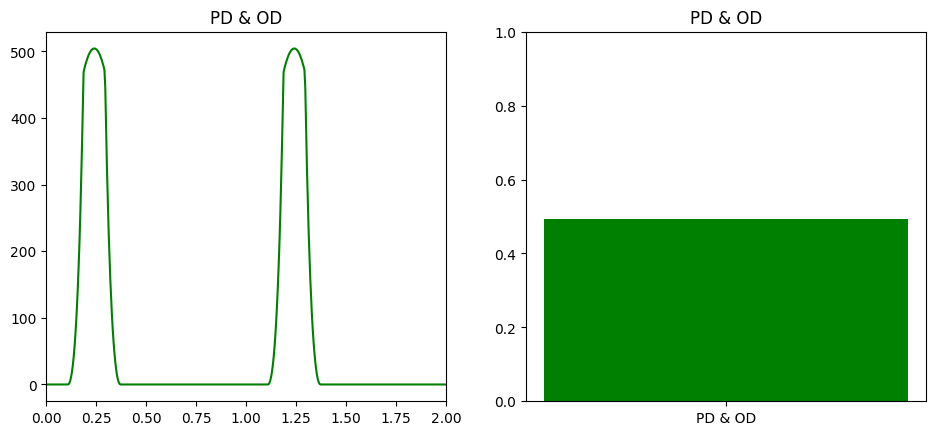

In [19]:
# Plot the caclium responses of one T4 contrast_2D_pd[0,:,:] but wrong amplitude.
plt.subplot(1,2,1)
plt.plot(t,calcium[0],color = 'g')
plt.xlim(0,2)
plt.title('PD & OD')
plt.subplot(1,2,2)
# now the mean response for the calcium
mean_value = np.mean(calcium[0])
PD_max = 149.25200273724872
normalized_mean = mean_value/PD_max # np.max(calcium[0])/PD_max #np.average(calcium[0])
plt.ylim(0,1)
plt.bar("PD & OD",normalized_mean,color = 'g')
plt.title('PD & OD')
plt.subplots_adjust(right=1.5)